In [1]:
# Using Conv Nets to classify iamges
# There are 5 categories: arctic fox, earless seal, penguin, polar bear, snow leopard
# Each class has around 400 images in total
# The data are split into training set (80%), validation set (10%), and test set (10%)
# The model uses fine tuning with VGG16.

In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
from keras import models
from keras import layers
from keras import optimizers

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 16,813,381
Trainable params: 9,178,117
Non-trainable params: 7,635,264
_________________________________________________________________


In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=5e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
import os,shutil

In [11]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
base_dir = 'E:/pictures splited'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [13]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical')

Found 1583 images belonging to 5 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 400 images belonging to 5 classes.


In [15]:
history = model.fit_generator(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
37/50 [=====================>........] - ETA: 24s - loss: 1.8776 - accuracy: 0.2202

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 98s 2s/step - loss: 1.8432 - accuracy: 0.2274 - val_loss: 1.5011 - val_accuracy: 0.4062
Epoch 2/100
50/50 [==============================] - 98s 2s/step - loss: 1.5381 - accuracy: 0.3525 - val_loss: 1.2722 - val_accuracy: 0.5000
Epoch 3/100
50/50 [==============================] - 99s 2s/step - loss: 1.3600 - accuracy: 0.4384 - val_loss: 0.9639 - val_accuracy: 0.6875
Epoch 4/100
50/50 [==============================] - 101s 2s/step - loss: 1.2145 - accuracy: 0.5085 - val_loss: 0.7541 - val_accuracy: 0.7500
Epoch 5/100
50/50 [==============================] - 99s 2s/step - loss: 1.0643 - accuracy: 0.5704 - val_loss: 0.8918 - val_accuracy: 0.6562
Epoch 6/100
50/50 [==============================] - 101s 2s/step - loss: 1.0302 - accuracy: 0.5736 - val_loss: 0.8204 - val_accuracy: 0.6875
Epoch 7/100
50/50 [==============================] - 100s 2s/step - loss: 0.9399 - accuracy: 0.6229 - val_loss: 0.7886 - val_accuracy: 0.7188
Epoch 8/100
50/50 [===

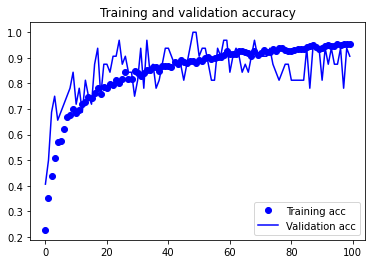

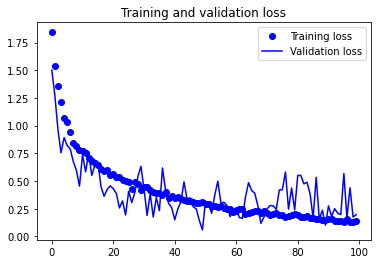

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
model.save('5_animals_20201223.h5')

In [18]:
history = model.fit_generator(
      train_generator,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=1)

Epoch 1/20
13/50 [======>.......................] - ETA: 1:04 - loss: 0.1501 - accuracy: 0.9398

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 94s 2s/step - loss: 0.1340 - accuracy: 0.9545 - val_loss: 0.4574 - val_accuracy: 0.8750
Epoch 2/20
50/50 [==============================] - 100s 2s/step - loss: 0.1216 - accuracy: 0.9602 - val_loss: 0.2686 - val_accuracy: 0.8750
Epoch 3/20
50/50 [==============================] - 101s 2s/step - loss: 0.1147 - accuracy: 0.9596 - val_loss: 0.4192 - val_accuracy: 0.8125
Epoch 4/20
50/50 [==============================] - 98s 2s/step - loss: 0.1338 - accuracy: 0.9501 - val_loss: 0.1776 - val_accuracy: 0.9062
Epoch 5/20
50/50 [==============================] - 97s 2s/step - loss: 0.1111 - accuracy: 0.9602 - val_loss: 0.3323 - val_accuracy: 0.9062
Epoch 6/20
50/50 [==============================] - 98s 2s/step - loss: 0.1119 - accuracy: 0.9596 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/20
50/50 [==============================] - 99s 2s/step - loss: 0.1194 - accuracy: 0.9602 - val_loss: 0.4287 - val_accuracy: 0.8750
Epoch 8/20
50/50 [===========